In [ ]:
pip install ultralytics opencv-python pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.9 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install ultralytics opencv-python


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dilavado/labeled-surgical-tools")

print("Path to dataset files:", path)

100%|██████████| 734M/734M [00:08<00:00, 94.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1


In [ ]:
!ls -R /root/.cache/kagglehub/datasets/ | head -40


/root/.cache/kagglehub/datasets/:
dilavado

/root/.cache/kagglehub/datasets/dilavado:
labeled-surgical-tools

/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools:
1.complete
versions

/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions:
1

/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1:
surgical-dataset
Surgical-Dataset

/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset:
Surgical-Dataset

/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset:
Images
Labels
Test-Train Groups
test-train_split_explanation.xlsx

/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Images:
All
Curved Mayo Scissor
Four classes separate
Scalpel
Straight Dissection Clamp
Straight Mayo Scissor

/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset

In [ ]:
!ls /root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels | head -20


label object names
label top-bottom
README.txt


In [ ]:
!cat "/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels/label object names"


cat: '/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels/label object names': Is a directory


In [ ]:
!cat "/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels/label object names"


cat: '/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels/label object names': Is a directory


In [ ]:
!head -20 "/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels/label top-bottom"


head: error reading '/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels/label top-bottom': Is a directory


In [ ]:
!ls /root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels/label\ top-bottom | head -20


bisturi100.txt
bisturi101.txt
bisturi102.txt
bisturi103.txt
bisturi104.txt
bisturi105.txt
bisturi106.txt
bisturi107.txt
bisturi108.txt
bisturi109.txt
bisturi10.txt
bisturi110.txt
bisturi111.txt
bisturi112.txt
bisturi113.txt
bisturi114.txt
bisturi115.txt
bisturi116.txt
bisturi117.txt
bisturi118.txt


In [ ]:
!head -20 /root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels/label\ top-bottom/<FILENAME>


/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `head -20 /root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels/label\ top-bottom/<FILENAME>'


In [ ]:
!head -20 "/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Labels/label top-bottom/bisturi100.txt"


1 0.617969 0.537500 0.231250 0.383333


In [ ]:
!ls "/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Test-Train Groups"


test-obj_detector.txt  train-obj_detector.txt


In [ ]:
import os, shutil

# Base dataset paths
base = "/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset"
img_dir = os.path.join(base, "Images/All/images")
lbl_dir = os.path.join(base, "Labels/label top-bottom")

# YOLO output structure
for split in ["train", "val", "test"]:
    os.makedirs(f"/content/yolo/{split}/images", exist_ok=True)
    os.makedirs(f"/content/yolo/{split}/labels", exist_ok=True)

# Read split files
train_list = os.path.join(base, "Test-Train Groups/train-obj_detector.txt")
test_list  = os.path.join(base, "Test-Train Groups/test-obj_detector.txt")

with open(train_list) as f:
    train_files = [x.strip() for x in f.readlines()]

with open(test_list) as f:
    test_files = [x.strip() for x in f.readlines()]

# Simple 80/20 split of train into train/val
val_count = int(0.2 * len(train_files))
val_files = train_files[:val_count]
train_files = train_files[val_count:]

def move_files(file_list, split):
    for fname in file_list:
        img_src = os.path.join(img_dir, fname + ".jpg")
        lbl_src = os.path.join(lbl_dir, fname + ".txt")
        img_dst = f"/content/yolo/{split}/images/{fname}.jpg"
        lbl_dst = f"/content/yolo/{split}/labels/{fname}.txt"

        if os.path.exists(img_src) and os.path.exists(lbl_src):
            shutil.copy(img_src, img_dst)
            shutil.copy(lbl_src, lbl_dst)

move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

print("✅ Dataset organized into YOLO format at /content/yolo/")


✅ Dataset organized into YOLO format at /content/yolo/


In [ ]:
yaml_content = """
train: /content/yolo/train/images
val: /content/yolo/val/images
test: /content/yolo/test/images

nc: 4
names: ["grasper", "hook", "scissors", "clipper"]
"""

with open("surgical_tools.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
!ls /root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Images/All/images | head -20


bisturi100.jpg
bisturi101.jpg
bisturi102.jpg
bisturi103.jpg
bisturi104.jpg
bisturi105.jpg
bisturi106.jpg
bisturi107.jpg
bisturi108.jpg
bisturi109.jpg
bisturi10.jpg
bisturi110.jpg
bisturi111.jpg
bisturi112.jpg
bisturi113.jpg
bisturi114.jpg
bisturi115.jpg
bisturi116.jpg
bisturi117.jpg
bisturi118.jpg


In [ ]:
!head -20 "/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset/Test-Train Groups/train-obj_detector.txt"


/home/roboticslab/darknet/Dataset/images/bisturi469.jpg
/home/roboticslab/darknet/Dataset/images/bisturi199.jpg
/home/roboticslab/darknet/Dataset/images/bisturi432.jpg
/home/roboticslab/darknet/Dataset/images/bisturi446.jpg
/home/roboticslab/darknet/Dataset/images/bisturi430.jpg
/home/roboticslab/darknet/Dataset/images/bisturi15.jpg
/home/roboticslab/darknet/Dataset/images/bisturi56.jpg
/home/roboticslab/darknet/Dataset/images/bisturi419.jpg
/home/roboticslab/darknet/Dataset/images/bisturi221.jpg
/home/roboticslab/darknet/Dataset/images/bisturi137.jpg
/home/roboticslab/darknet/Dataset/images/bisturi229.jpg
/home/roboticslab/darknet/Dataset/images/bisturi333.jpg
/home/roboticslab/darknet/Dataset/images/bisturi164.jpg
/home/roboticslab/darknet/Dataset/images/bisturi318.jpg
/home/roboticslab/darknet/Dataset/images/bisturi98.jpg
/home/roboticslab/darknet/Dataset/images/bisturi263.jpg
/home/roboticslab/darknet/Dataset/images/bisturi102.jpg
/home/roboticslab/darknet/Dataset/images/bisturi250

In [ ]:
import os, shutil

# Base dataset dirs
base = "/root/.cache/kagglehub/datasets/dilavado/labeled-surgical-tools/versions/1/surgical-dataset/Surgical-Dataset"
img_dir = os.path.join(base, "Images/All/images")
lbl_dir = os.path.join(base, "Labels/label top-bottom")

# YOLO structure
for split in ["train", "val", "test"]:
    os.makedirs(f"/content/yolo/{split}/images", exist_ok=True)
    os.makedirs(f"/content/yolo/{split}/labels", exist_ok=True)

# Split lists
train_list = os.path.join(base, "Test-Train Groups/train-obj_detector.txt")
test_list  = os.path.join(base, "Test-Train Groups/test-obj_detector.txt")

# Read files (get only the basename, like bisturi469.jpg → bisturi469)
with open(train_list) as f:
    train_files = [os.path.basename(x.strip()).replace(".jpg","") for x in f.readlines()]

with open(test_list) as f:
    test_files = [os.path.basename(x.strip()).replace(".jpg","") for x in f.readlines()]

# Split train into train/val (80/20)
val_count = int(0.2 * len(train_files))
val_files = train_files[:val_count]
train_files = train_files[val_count:]

def copy_files(file_list, split):
    for fname in file_list:
        img_src = os.path.join(img_dir, fname + ".jpg")
        lbl_src = os.path.join(lbl_dir, fname + ".txt")
        img_dst = f"/content/yolo/{split}/images/{fname}.jpg"
        lbl_dst = f"/content/yolo/{split}/labels/{fname}.txt"

        if os.path.exists(img_src) and os.path.exists(lbl_src):
            shutil.copy(img_src, img_dst)
            shutil.copy(lbl_src, lbl_dst)

copy_files(train_files, "train")
copy_files(val_files, "val")
copy_files(test_files, "test")

print("✅ Images + labels organized into /content/yolo/")


✅ Images + labels organized into /content/yolo/


In [ ]:
yaml_content = """
train: /content/yolo/train/images
val: /content/yolo/val/images
test: /content/yolo/test/images

nc: 4
names: ["grasper", "hook", "scissors", "clipper"]
"""

with open("surgical_tools.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
!ls /content/yolo/train/images | head -10

bisturi551.jpg
bisturi552.jpg
bisturi555.jpg
bisturi556.jpg
bisturi557.jpg
bisturi559.jpg
bisturi560.jpg
bisturi561.jpg
bisturi562.jpg
bisturi566.jpg


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")
model.train(data="surgical_tools.yaml", epochs=50, imgsz=640, batch=16)


Ultralytics 8.3.186 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=surgical_tools.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, pr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x792a42fa4860>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
!ls runs/detect/train


args.yaml			 labels.jpg	      train_batch3682.jpg
BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxP_curve.png			 results.png	      val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix.png		 train_batch3680.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch3681.jpg  weights


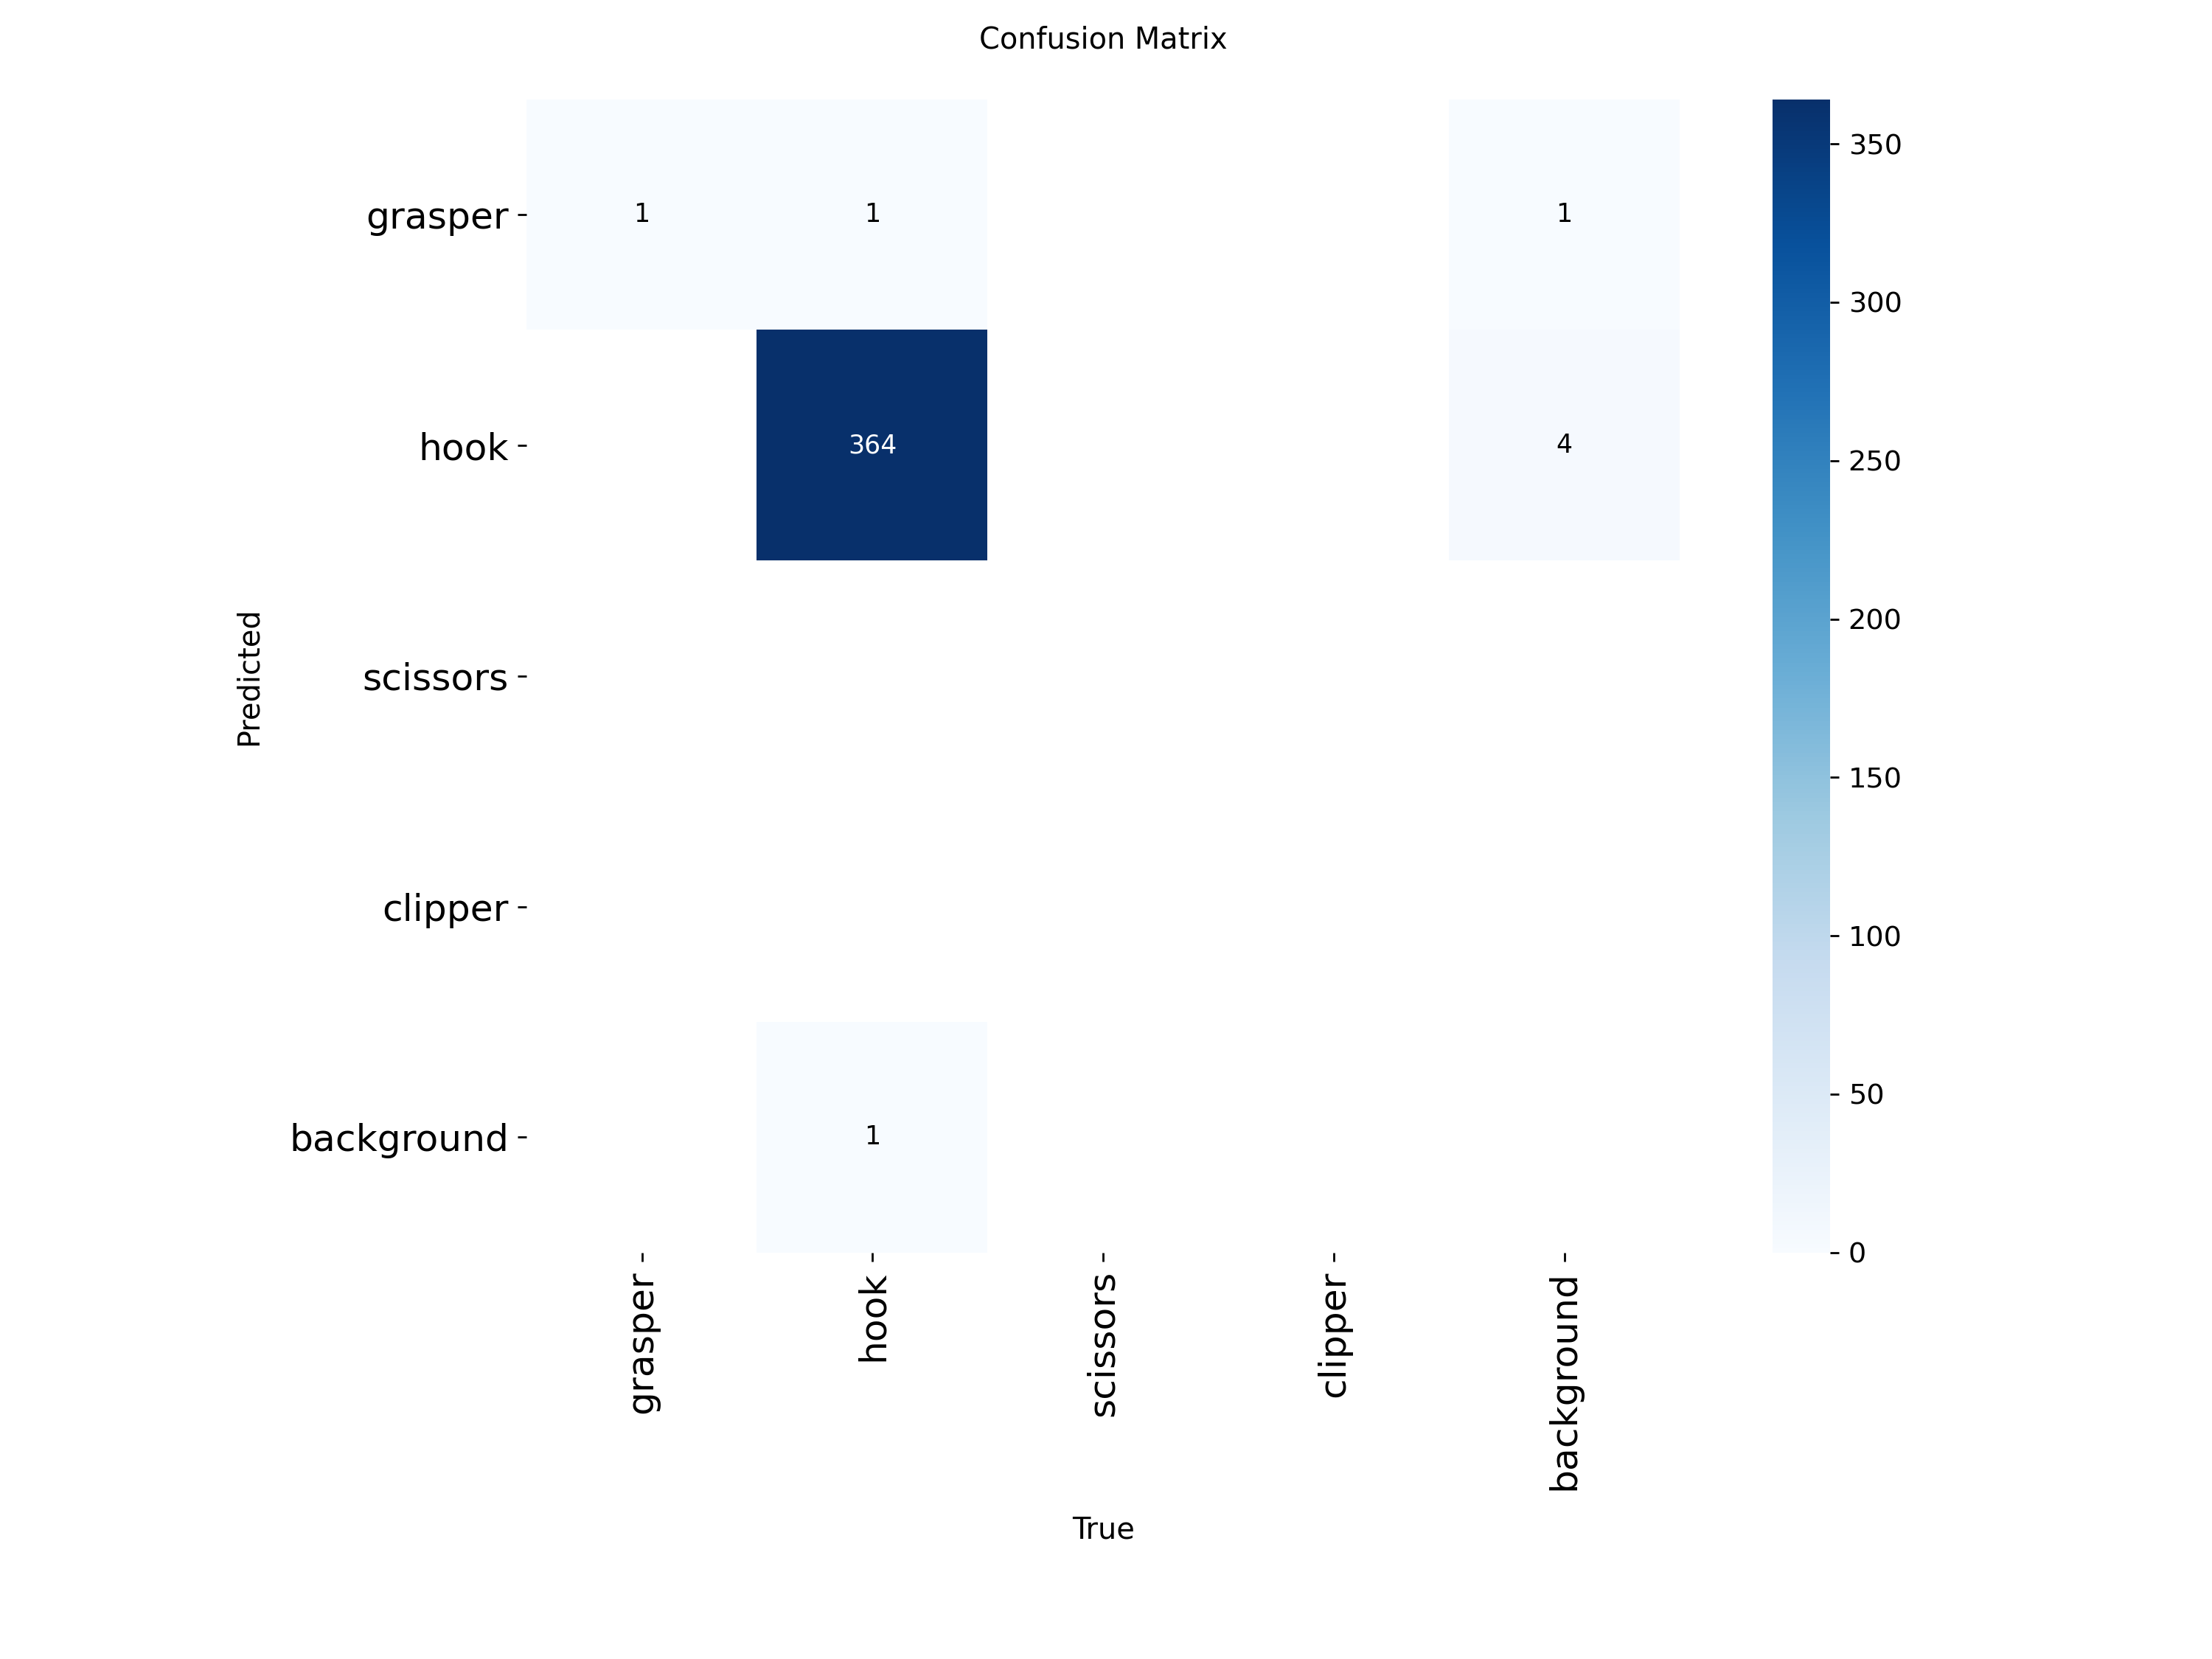

In [ ]:
from IPython.display import Image

# Training results
Image(filename="runs/detect/train/results.png")

# Confusion matrix
Image(filename="runs/detect/train/confusion_matrix.png")


In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Run prediction on test set
results = model.predict(source="/content/yolo/test/images", save=True, conf=0.5)



image 1/786 /content/yolo/test/images/bisturi1.jpg: 480x640 1 hook, 46.1ms
image 2/786 /content/yolo/test/images/bisturi100.jpg: 480x640 1 hook, 12.9ms
image 3/786 /content/yolo/test/images/bisturi103.jpg: 480x640 1 hook, 12.9ms
image 4/786 /content/yolo/test/images/bisturi104.jpg: 480x640 1 hook, 12.9ms
image 5/786 /content/yolo/test/images/bisturi107.jpg: 480x640 1 hook, 12.8ms
image 6/786 /content/yolo/test/images/bisturi110.jpg: 480x640 1 hook, 12.8ms
image 7/786 /content/yolo/test/images/bisturi116.jpg: 480x640 1 hook, 12.8ms
image 8/786 /content/yolo/test/images/bisturi119.jpg: 480x640 1 hook, 12.8ms
image 9/786 /content/yolo/test/images/bisturi120.jpg: 480x640 1 hook, 12.8ms
image 10/786 /content/yolo/test/images/bisturi125.jpg: 480x640 1 hook, 12.9ms
image 11/786 /content/yolo/test/images/bisturi127.jpg: 480x640 1 hook, 12.9ms
image 12/786 /content/yolo/test/images/bisturi128.jpg: 480x640 1 hook, 12.9ms
image 13/786 /content/yolo/test/images/bisturi129.jpg: 480x640 1 hook, 12.

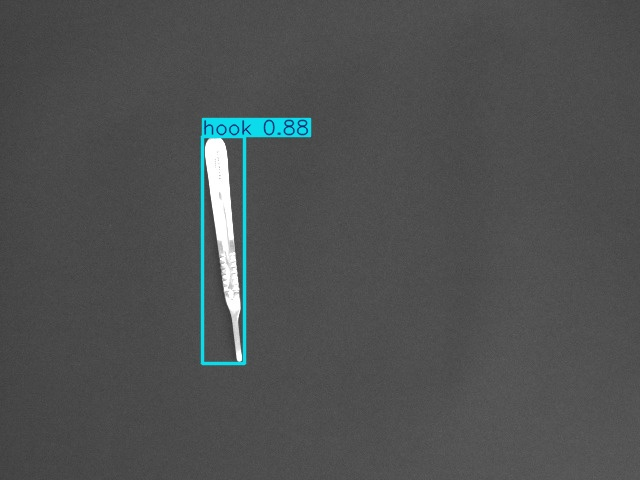

In [ ]:
from IPython.display import Image
import glob

# Show one result image
result_images = glob.glob("runs/detect/predict/*.jpg")
Image(filename=result_images[0])


In [ ]:
import cv2
import pandas as pd
from datetime import datetime
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Define surgical tool classes (same order as training)
instrument_classes = ["grasper", "hook", "scissors", "clipper"]

present_instruments = set()
alerts = []

cap = cv2.VideoCapture("surgery_video.mp4")  # replace with 0 for webcam

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    current_instruments = set()

    for r in results:
        for box in r.boxes:
            cls_id = int(box.cls[0])
            label = instrument_classes[cls_id]
            conf = float(box.conf[0])

            if conf > 0.5:
                current_instruments.add(label)

    # Detect missing instruments
    missing = present_instruments - current_instruments
    for m in missing:
        print(f"⚠️ ALERT: {m} missing at {datetime.now()}")
        alerts.append({"time": datetime.now(), "missing_tool": m})

    present_instruments |= current_instruments

cap.release()
cv2.destroyAllWindows()

# Save alert logs
pd.DataFrame(alerts).to_csv("tool_alerts.csv", index=False)
print("✅ Alerts saved to tool_alerts.csv")


✅ Alerts saved to tool_alerts.csv


In [ ]:
!ls runs/detect/train*/weights


best.pt  last.pt


In [ ]:
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")


In [ ]:
from google.colab import files
files.download("runs/detect/train/weights/best.pt")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls /content/yolo/val/images | head -10


bisturi101.jpg
bisturi102.jpg
bisturi108.jpg
bisturi109.jpg
bisturi10.jpg
bisturi112.jpg
bisturi114.jpg
bisturi115.jpg
bisturi117.jpg
bisturi118.jpg


In [ ]:
results = model.predict(source="/content/yolo/val/images", save=True, conf=0.5)



image 1/366 /content/yolo/val/images/bisturi10.jpg: 480x640 1 hook, 13.7ms
image 2/366 /content/yolo/val/images/bisturi101.jpg: 480x640 1 hook, 12.9ms
image 3/366 /content/yolo/val/images/bisturi102.jpg: 480x640 1 hook, 12.9ms
image 4/366 /content/yolo/val/images/bisturi108.jpg: 480x640 1 hook, 12.9ms
image 5/366 /content/yolo/val/images/bisturi109.jpg: 480x640 1 hook, 12.8ms
image 6/366 /content/yolo/val/images/bisturi112.jpg: 480x640 1 hook, 12.9ms
image 7/366 /content/yolo/val/images/bisturi114.jpg: 480x640 1 hook, 12.9ms
image 8/366 /content/yolo/val/images/bisturi115.jpg: 480x640 1 hook, 10.3ms
image 9/366 /content/yolo/val/images/bisturi117.jpg: 480x640 1 hook, 9.9ms
image 10/366 /content/yolo/val/images/bisturi118.jpg: 480x640 1 hook, 9.8ms
image 11/366 /content/yolo/val/images/bisturi12.jpg: 480x640 1 hook, 9.8ms
image 12/366 /content/yolo/val/images/bisturi122.jpg: 480x640 1 hook, 9.8ms
image 13/366 /content/yolo/val/images/bisturi123.jpg: 480x640 1 hook, 9.9ms
image 14/366 /